In [286]:
!uv pip install IPython numpy scipy matplotlib ipympl ipywidgets

Using Python 3.13.3 environment at: /Users/guen/repos/guenp/scipy-sphere/.venv
Audited 6 packages in 7ms


In [287]:
%matplotlib widget

In [288]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

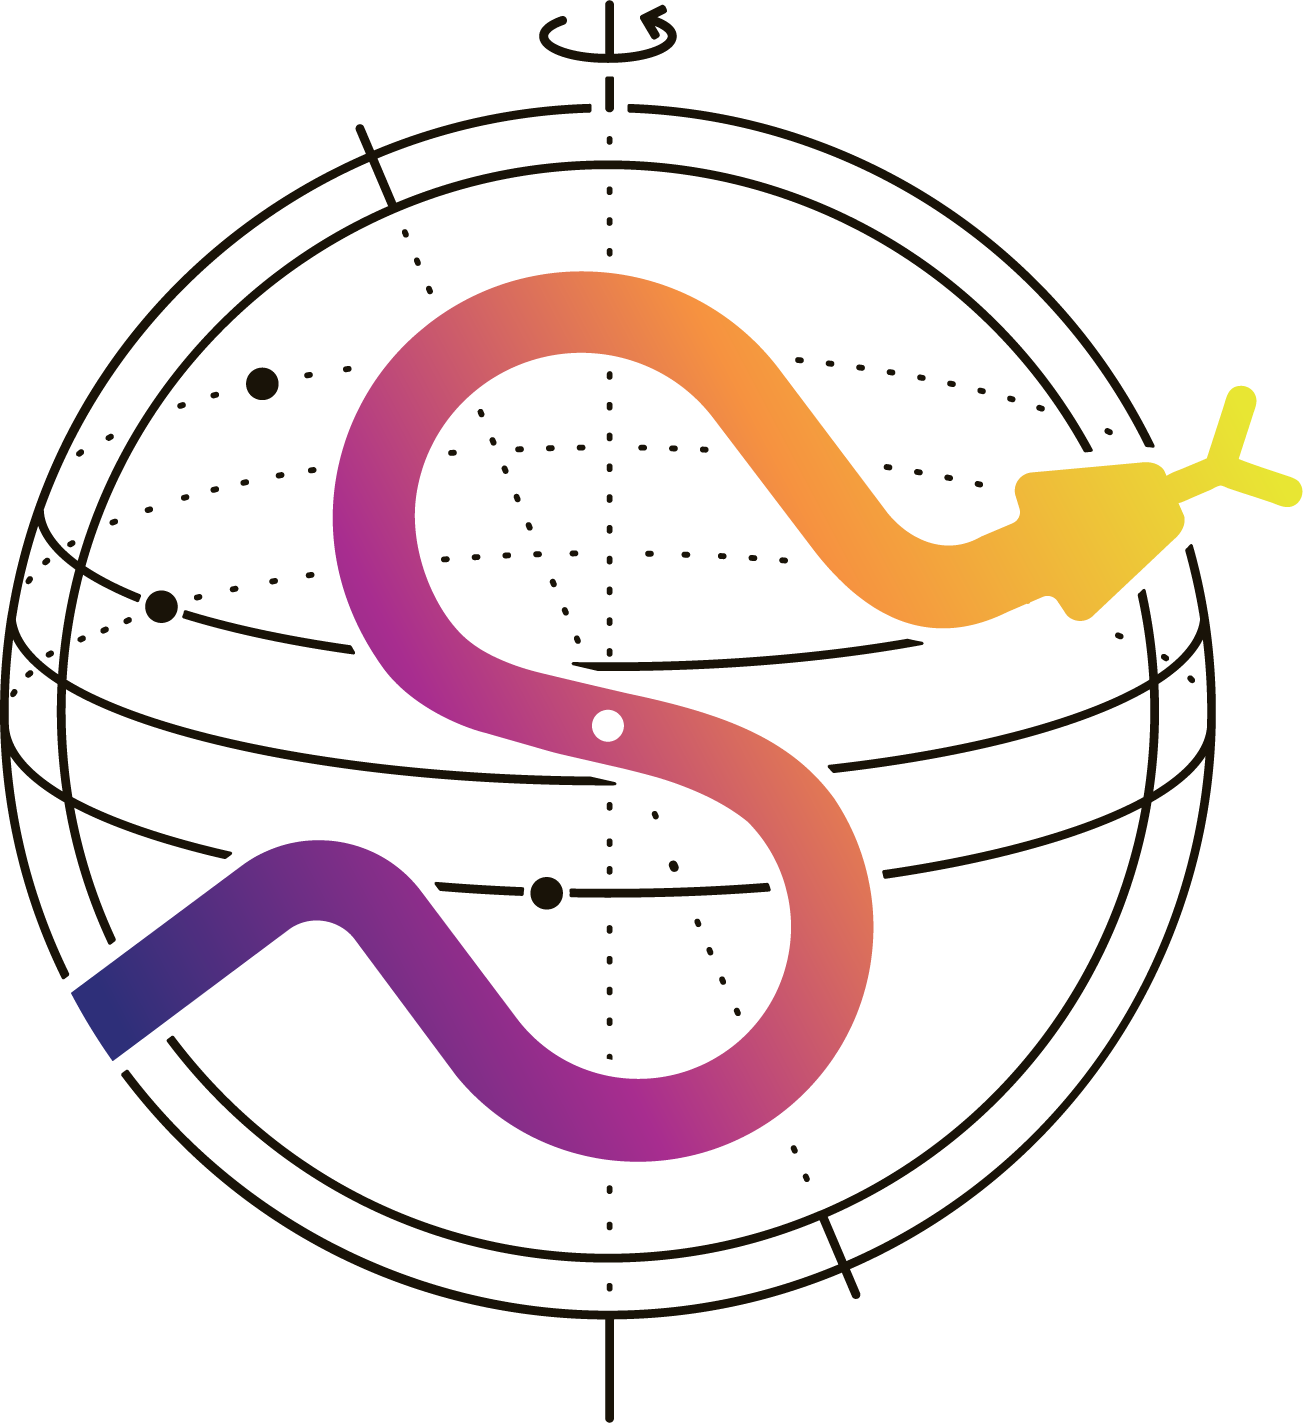

In [289]:
Image.open('Logo_color-black.png')

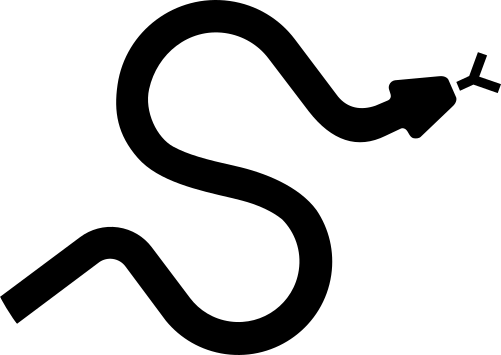

In [290]:
Image.open('logo.png')

In [291]:
import numpy as np
from qutip import Bloch
import matplotlib.pyplot as plt
from matplotlib import animation

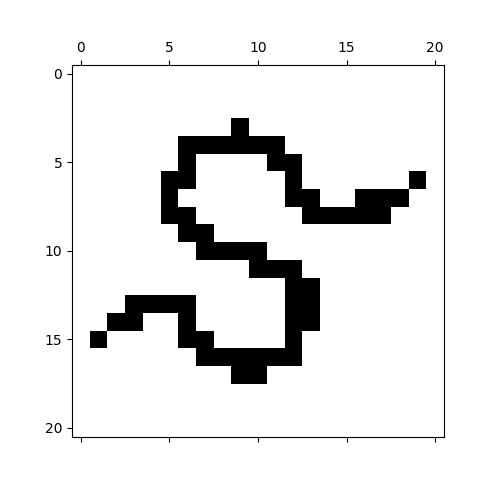

In [292]:
logo = Image.open('logo.png')
logo_arr = np.array(logo.convert('L'))[::25,::25]
ly, lx = logo_arr.shape
L = max(logo_arr.shape)
padded = np.ones((L, L))
for i in range(ly):
    I = i + (L-ly)//2
    for j in range(lx):
        if not logo_arr[i, j]:
            padded[I, j] = logo_arr[i, j]
plt.matshow(padded, cmap='Greys_r')

In [293]:
x, y = np.linspace(-1, 1, L), np.linspace(-1, 1, L)
xg, yg = np.meshgrid(x, y)
xs, ys = xg[padded==0], yg[padded==0]
zs = np.sqrt(1 - (xs**2 + ys**2)/1.1)  # shrink by 10%

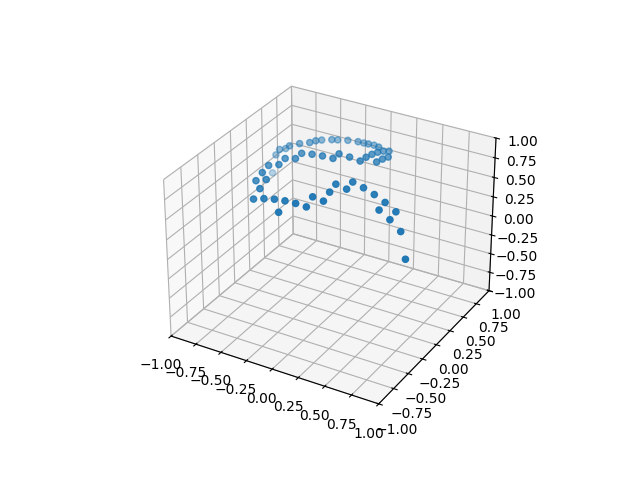

In [294]:

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xs, ys, zs)

ax.set_xlim3d((-1, 1))
ax.set_ylim3d((-1, 1))
ax.set_zlim3d((-1, 1))

plt.show()

In [295]:
# calculate carthesian coordinates
x, y = np.linspace(-1, 1, L), np.linspace(-1, 1, L)
xg, yg = np.meshgrid(x, y)
xs, ys = xg[padded==0], yg[padded==0]
zs = np.sqrt(1 - (xs**2 + ys**2)/1.1)  # shrink by 10%

# offset theta by pi/2
d_theta = np.pi / 2

# convert to spherical coordinates
rho = np.sqrt(xs**2 + ys**2 + zs**2)
# add theta offset
theta = np.atan2(ys, xs) + d_theta
phi = np.acos(zs / rho)

# 

# convert back to carthesian coordinates
zs = rho * np.sin(phi) * np.cos(theta)
ys = rho * np.sin(phi) * np.sin(theta)
xs = rho * np.cos(phi)

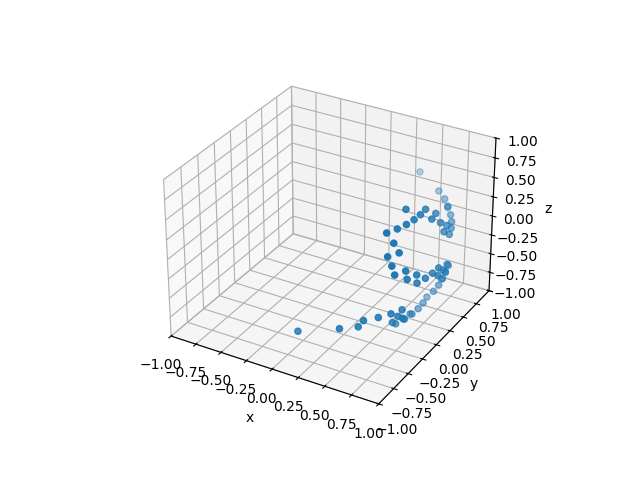

In [296]:

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xs, ys, zs)

ax.set_xlim3d((-1, 1))
ax.set_ylim3d((-1, 1))
ax.set_zlim3d((-1, 1))

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

plt.show()

In [297]:
n_start = xs.argmin()
unordered = [(x,y,z) for x, y, z in zip(xs, ys, zs)]
ordered = []
remaining = list(unordered)
ordered.append(remaining.pop(49))
current = unordered[49]

for i in range(len(unordered)-1):
    diffs = [np.sqrt((r[0]-current[0])**2 + (r[1]-current[1])**2 + (r[2]-current[2])**2) for r in remaining]
    current = remaining.pop(np.array(diffs).argmin())
    ordered.append(current)

In [298]:
xss, yss, zss = np.array(ordered).T

In [299]:
# order points such that the playback starts from the bottom left
min(xs), min(ys), min(zs)

(np.float64(0.1906925178491187),
 np.float64(-0.8999999999999999),
 np.float64(-0.7000000000000003))

In [300]:
cm = plt.cm.plasma

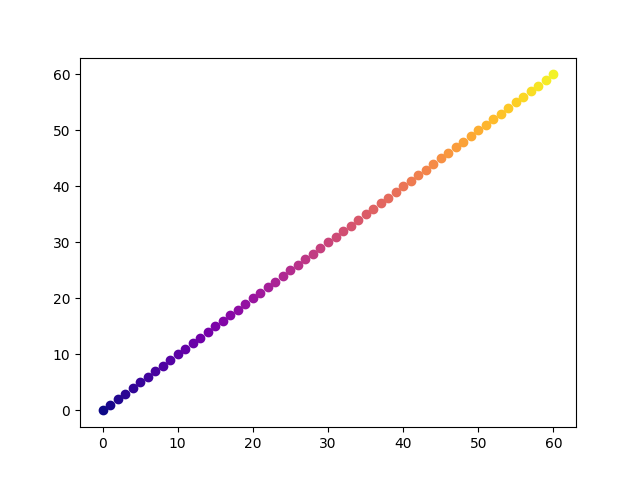

In [301]:
plt.figure()
for i,c in enumerate(cm(np.array(list(range(61)))/len(xs))):
    plt.plot(i, i, 'o', color=c)
plt.show()

In [302]:
len(xss), len(yss), len(zss)

(61, 61, 61)

In [303]:
distance = np.sqrt((xss-1)**2 + yss**2 + zss**2)

In [304]:
colors = cm(np.array(list(distance)))

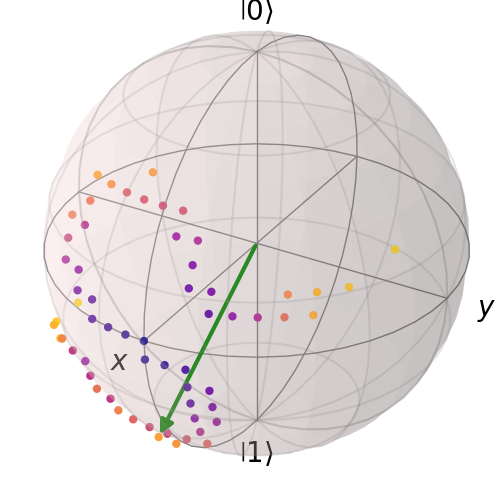

In [305]:
# fig, ax = plt.subplots()
b = Bloch()
b.vector_color = ['r']
colors = cm(np.array(list(range(61)))/65)
def update(n):
    b.clear()
    b.add_points([xss[:n+1], yss[:n+1], zss[:n+1]])
    b.point_color=colors[:n+1]
    b.add_vectors([xss[n], yss[n], zss[n]])
    b.make_sphere()

update(60)

In [306]:
import ipywidgets as widgets

play = widgets.Play(
    value=60,
    min=0,
    max=60,
    step=1,
    interval=500,
    description="Press play",
    disabled=False
)
output = widgets.Output()

def observer(event):
    with output:
        n = event["new"]
        # ax.plot([0], [n], "o")
        update(n)

play.observe(observer, names="value")
slider = widgets.IntSlider()
widgets.jslink((play, 'value'), (slider, 'value'))
widgets.HBox([output, play, slider])